In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%run 1_cleaning_data.ipynb
data = data

Cohort Analysis helps in understanding the behavior and retention of specific groups of users over time. By analyzing cohorts, businesses can measure the impact of changes on different user groups and identify patterns in user engagement.

In [5]:
# performing the cohort analysis
# requires some feature engineering extracting cohort month and index
data['cohort_month'] = data['Order Date'].dt.to_period('M')


In [6]:
#extracting cohort index: diff betwen cohort-year and order-year *12
# + cohort-month and order-month +1
data['cohort_index'] = (data['cohort_month'].dt.year - data['Order Date'].dt.year)*12 +  (data['cohort_month'].dt.month - data['Order Date'].dt.month)+1



In [7]:
cohort_data = data.groupby(['cohort_month','cohort_index']).agg({
    'Purchase Address':pd.Series.nunique}).reset_index()
cohort_data

,cohort_month,cohort_index,Purchase Address
0,2019-01,1,9154
1,2019-02,1,11304
2,2019-03,1,14245
3,2019-04,1,17112
4,2019-05,1,15471
5,2019-06,1,12720
6,2019-07,1,13473
7,2019-08,1,11300
8,2019-09,1,11025
9,2019-10,1,18914


In [8]:
cohort_pivot = cohort_data.pivot_table(index='cohort_month',
                                       columns = 'cohort_index',
                                       values = 'Purchase Address')

In [9]:
cohort_pivot

cohort_index,1
cohort_month,
2019-01,9154.0
2019-02,11304.0
2019-03,14245.0
2019-04,17112.0
2019-05,15471.0
2019-06,12720.0
2019-07,13473.0
2019-08,11300.0
2019-09,11025.0


In [10]:
cohort_size = cohort_pivot.iloc[:,0]

In [11]:
retention = cohort_pivot.divide(cohort_size, axis=0)

In [12]:
retention


cohort_index,1
cohort_month,
2019-01,1.0
2019-02,1.0
2019-03,1.0
2019-04,1.0
2019-05,1.0
2019-06,1.0
2019-07,1.0
2019-08,1.0
2019-09,1.0


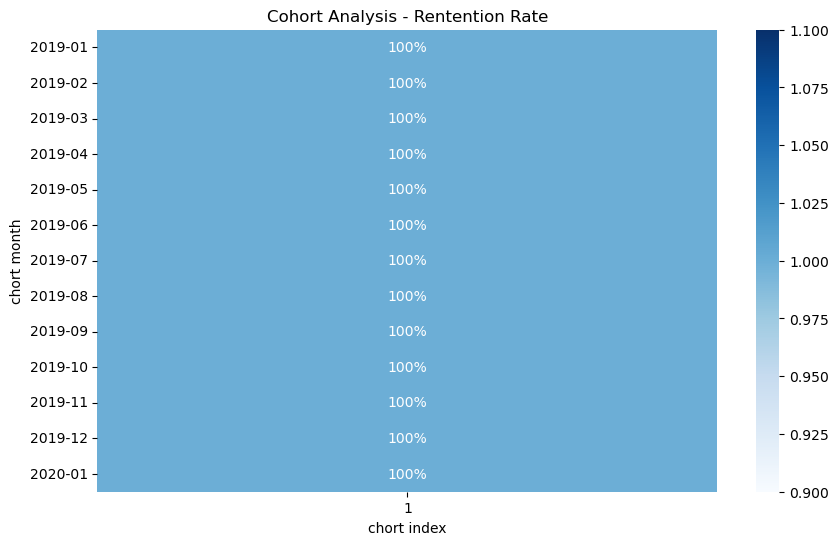

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(retention, annot=True, cmap='Blues', fmt='.0%',)
plt.title('Cohort Analysis - Rentention Rate')
plt.xlabel('chort index')
plt.ylabel('chort month')
plt.show()